## Loading Dataset

In [80]:
import pandas as pd
import numpy as np

In [81]:
# Reading the csv file and displaying the first 5 rows of the dataframe.
products = pd.read_csv(r'Dataset/amazon_baby_subset.csv')
products.head()

,name,review,rating,sentiment
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1


In [82]:
# Reading the important words from the json file.
import json
with open('Dataset/important_words.json','rb') as file:
    important_words = json.load(file)
# It prints the list of important words.
print(important_words)

['baby', 'one', 'great', 'love', 'use', 'would', 'like', 'easy', 'little', 'seat', 'old', 'well', 'get', 'also', 'really', 'son', 'time', 'bought', 'product', 'good', 'daughter', 'much', 'loves', 'stroller', 'put', 'months', 'car', 'still', 'back', 'used', 'recommend', 'first', 'even', 'perfect', 'nice', 'bag', 'two', 'using', 'got', 'fit', 'around', 'diaper', 'enough', 'month', 'price', 'go', 'could', 'soft', 'since', 'buy', 'room', 'works', 'made', 'child', 'keep', 'size', 'small', 'need', 'year', 'big', 'make', 'take', 'easily', 'think', 'crib', 'clean', 'way', 'quality', 'thing', 'better', 'without', 'set', 'new', 'every', 'cute', 'best', 'bottles', 'work', 'purchased', 'right', 'lot', 'side', 'happy', 'comfortable', 'toy', 'able', 'kids', 'bit', 'night', 'long', 'fits', 'see', 'us', 'another', 'play', 'day', 'money', 'monitor', 'tried', 'thought', 'never', 'item', 'hard', 'plastic', 'however', 'disappointed', 'reviews', 'something', 'going', 'pump', 'bottle', 'cup', 'waste', 'retu

## Cleaning the Data

In [83]:
def remove_punctuation(text):
    """
    The function takes in a string, and returns a new string with all of the punctuation removed. 
    
    The function uses Python's built-in string.punctuation variable, which is a string of all the punctuation characters. 
    
    The function str.translate() takes in a translation table, which you can generate using the maketrans() helper function
    in the string library. 
    
    :param text: The text to be processed
    :return: A string with all punctuation removed.
    """
    import string
    return str(text).translate(str.maketrans('', '', string.punctuation)) 

# Applying the remove_punctuation function to the review column of the products dataframe.
products['review_clean'] = products['review'].apply(remove_punctuation)

# Displaying the first 5 rows of the dataframe.
products.head()

,name,review,rating,sentiment,review_clean
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...


In [84]:
# Counting the number of missing values in each column.
products.isna().sum()

name             90
review          241
rating            0
sentiment         0
review_clean      0
dtype: int64

In [85]:
# Replacing all the empty name, reviews with an empty string.
products = products.fillna({'name':'', 'review':''})

## Feature Engineering

In [87]:
# Creating a new column for each word in important_words and populating it with the number of times that word appears in the review.
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s : s.split().count(word))

In [88]:
# Creating a new column in the product dataframe called 'contains_perfect' and it is counting the number of times the word 'perfect' appears in the review_clean column.
products['contains_perfect'] = products['perfect'] >=1

C:\Users\maria\AppData\Local\Temp\ipykernel_15632\104910223.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  products['contains_perfect'] = products['perfect'] >=1


In [89]:
products.head()

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,picture,completely,wish,buying,babies,won,tub,almost,either,contains_perfect
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,False
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,False


In [90]:
def get_numpy_data(dataframe, features, label):
    """
    Given a dataframe, a list of features (e.g. [‘sqft_living’, ‘bedrooms’]), to be used as inputs, and a name of the output
    (e.g. ‘price’), return a feature matrix (i.e. a 2D array) consisting of first a column of ones followed by columns
    containing the values of the input features in the data set in the same order as the input list. It also returns an
    array of the values of the output in the data set (e.g. ‘price’).
    
    :param dataframe: the dataframe you want to convert to a numpy array
    :param features: list of features (column names)
    :param label: the name of the column you want to predict
    :return: The feature matrix and the label array
    """
    dataframe['constant'] = 1
    features = ['constant'] + features
    features_frame = dataframe[features]
    feature_matrix = features_frame.values
    label_sarray = dataframe[label]
    label_array = label_sarray.values
    return(feature_matrix, label_array)

get_numpy_data(products, important_words,'sentiment')

C:\Users\maria\AppData\Local\Temp\ipykernel_15632\751142716.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe['constant'] = 1


(array([[1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([ 1,  1,  1, ..., -1, -1, -1], dtype=int64))

In [91]:
def predict_probability(feature_matrix, coefficients):
    '''
    produces probablistic estimate for P(y_i = +1 | x_i, w).
    estimate ranges between 0 and 1.
    '''
    # Take dot product of feature_matrix and coefficients  
    # YOUR CODE HERE
    score = np.dot(feature_matrix, coefficients)
    
    # Compute P(y_i = +1 | x_i, w) using the link function
    # YOUR CODE HERE
    predictions = 1/(1+np.exp(-score))
    
    # return predictions
    return predictions

In [92]:
def feature_derivative(errors, feature):     
    # Compute the dot product of errors and feature
    derivative = np.dot(errors,feature)
        # Return the derivative
    return derivative

In [93]:
def compute_log_likelihood(feature_matrix, sentiment, coefficients):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    lp = np.sum((indicator-1)*scores - np.log(1. + np.exp(-scores)))
    return lp

In [105]:
from math import sqrt
import matplotlib.pyplot as plt

def logistic_regression(feature_matrix, sentiment, initial_coefficients, step_size, max_iter, plot=False):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    if plot:
        likelihood_list = []
    for itr in range(max_iter):
        # Predict P(y_i = +1|x_1,w) using your predict_probability() function
        # YOUR CODE HERE
        predictions = predict_probability(feature_matrix, coefficients)

        # Compute indicator value for (y_i = +1)
        indicator = (sentiment==+1)

        # Compute the errors as indicator - predictions
        errors = indicator - predictions

        for j in range(len(coefficients)): 
            # loop over each coefficient
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j]
            # compute the derivative for coefficients[j]. Save it in a variable called derivative
            # YOUR CODE HERE
            derivative = feature_derivative(errors, feature_matrix[:,j])

            # add the step size times the derivative to the current coefficient
            # YOUR CODE HERE
            coefficients[j] += step_size*derivative
            

        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood(feature_matrix, sentiment, coefficients)
            if plot:
                likelihood_list.append(compute_log_likelihood(feature_matrix, sentiment, coefficients))
            else:
                print ('iteration %*d: log likelihood of observed labels = %.8f' %(int(np.ceil(np.log10(max_iter))), itr, lp))
    if plot:
        x= [i for i in range(len(likelihood_list))]
        plt.plot(x,likelihood_list,'ro')
        plt.show()
    if not plot:
        return coefficients

In [95]:
# Getting the feature matrix for the sentiment column.
feature_matrix,sentiment = get_numpy_data(products, important_words,'sentiment')
logistic_regression(feature_matrix, sentiment, np.zeros(194), 1e-7, 301)

iteration   0: log likelihood of observed labels = -36780.91768478
iteration   1: log likelihood of observed labels = -36775.13434712
iteration   2: log likelihood of observed labels = -36769.35713564
iteration   3: log likelihood of observed labels = -36763.58603240
iteration   4: log likelihood of observed labels = -36757.82101962
iteration   5: log likelihood of observed labels = -36752.06207964
iteration   6: log likelihood of observed labels = -36746.30919497
iteration   7: log likelihood of observed labels = -36740.56234821
iteration   8: log likelihood of observed labels = -36734.82152213
iteration   9: log likelihood of observed labels = -36729.08669961
iteration  10: log likelihood of observed labels = -36723.35786366
iteration  11: log likelihood of observed labels = -36717.63499744
iteration  12: log likelihood of observed labels = -36711.91808422
iteration  13: log likelihood of observed labels = -36706.20710739
iteration  14: log likelihood of observed labels = -36700.5020

array([ 5.16220157e-03,  1.55656966e-02, -8.50204675e-03,  6.65460842e-02,
        6.58907629e-02,  5.01743882e-03, -5.38601484e-02, -3.50488413e-03,
        6.47945868e-02,  4.54356263e-02,  3.98353364e-03,  2.00775410e-02,
        3.01350011e-02, -2.87115530e-02,  1.52161964e-02,  2.72592062e-04,
        1.19448177e-02, -1.82461935e-02, -1.21706420e-02, -4.15110334e-02,
        2.76820391e-03,  1.77031999e-02, -4.39700067e-03,  4.49764014e-02,
        9.90916464e-03,  8.99239081e-04, -1.36219516e-03,  1.26859357e-02,
        8.26466695e-03, -2.77426972e-02,  6.10128809e-04,  1.54084501e-02,
       -1.32134753e-02, -3.00512492e-02,  2.97399371e-02,  1.84087080e-02,
        2.86178752e-03, -1.05768015e-02, -6.57350362e-04, -1.01476555e-02,
       -4.79579528e-03,  7.50891810e-03,  4.27938289e-03,  3.06785501e-03,
       -2.20317661e-03,  9.57273354e-03,  9.91666827e-05, -1.98462567e-02,
        1.75702722e-02,  1.55478612e-03, -1.77375440e-02,  9.78324102e-03,
        1.17031606e-02, -

# Questions

> Question 1
> 
> How many reviews in **amazon_baby_subset.gl** contain the word **perfect**?
>

In [97]:
# Counting the number of rows in the dataframe that have a value greater than 0 in the column 'contains_perfect'.
products['contains_perfect'] = products['perfect'] >=1
(products['contains_perfect']).sum()

2955

> Question 2
> 
> Consider the **feature_matrix** that was obtained by converting our data to NumPy format.
> 
> How many features are there in the **feature_matrix**?
>

In [98]:
# Getting the feature matrix for the sentiment column.
feature_matrix,_ = get_numpy_data(products, important_words,'sentiment')
# Getting the number of columns in the feature matrix.
feature_matrix.shape[1]

194

> Question 3
> 
> Assuming that the intercept is present, how does the number of features in **feature_matrix** relate to the number of features in the logistic regression model? 
>
> Let x = [number of features in feature_matrix] and y = [number of features in logistic regression model].

In [113]:
#x == y+1
feature_matrix.shape[1] == weights.shape[0]

True

> Question 4
> 
> Run your logistic regression solver with provided parameters.
> 
> As each iteration of gradient ascent passes, does the log-likelihood increase or decrease?

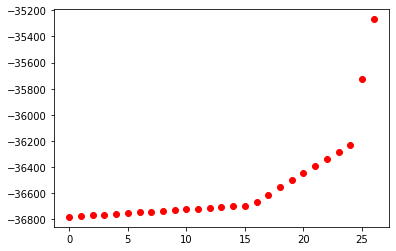

In [106]:
# Getting the feature matrix for the sentiment column.
feature_matrix,sentiment = get_numpy_data(products, important_words,'sentiment')
# Training the model
logistic_regression(feature_matrix, sentiment, np.zeros(194), 1e-7, 301, True)

> Question 5
> 
> We make predictions using the weights just learned.
> 
> How many reviews were predicted to have positive sentiment?

In [107]:
# # Getting the feature matrix for the sentiment column.
feature_matrix,sentiment = get_numpy_data(products, important_words,'sentiment')
# Training the model
weights = logistic_regression(feature_matrix, sentiment, np.zeros(194), 1e-7, 301)
print("Number of positive predictions :", np.sum(np.dot(feature_matrix, weights)>0))

iteration   0: log likelihood of observed labels = -36780.91768478
iteration   1: log likelihood of observed labels = -36775.13434712
iteration   2: log likelihood of observed labels = -36769.35713564
iteration   3: log likelihood of observed labels = -36763.58603240
iteration   4: log likelihood of observed labels = -36757.82101962
iteration   5: log likelihood of observed labels = -36752.06207964
iteration   6: log likelihood of observed labels = -36746.30919497
iteration   7: log likelihood of observed labels = -36740.56234821
iteration   8: log likelihood of observed labels = -36734.82152213
iteration   9: log likelihood of observed labels = -36729.08669961
iteration  10: log likelihood of observed labels = -36723.35786366
iteration  11: log likelihood of observed labels = -36717.63499744
iteration  12: log likelihood of observed labels = -36711.91808422
iteration  13: log likelihood of observed labels = -36706.20710739
iteration  14: log likelihood of observed labels = -36700.5020

> Question 6
> 
> What is the accuracy of the model on predictions made above? (round to 2 digits of accuracy)

In [108]:
from sklearn import metrics
pred = (np.dot(feature_matrix, weights)>0).astype(int)
actual = (sentiment>0).astype(int)
print("Accuracy Score is ",(pred == actual).sum()/ pred.shape[0])

Accuracy Score is  0.7518653904130238


> Question 7
> 
> We look at "most positive" words, the words that correspond most strongly with positive reviews.
> 
> Which of the following words is **not** present in the top 10 "most positive" words?

In [109]:
zipped_name_weights = list(zip(['constant'] + important_words, weights))
zipped_name_weights.sort(key= lambda x:x[1],reverse=True)
print(zipped_name_weights[0:11])

[('great', 0.0665460841704577), ('love', 0.06589076292212326), ('easy', 0.0647945868025784), ('little', 0.04543562630842137), ('loves', 0.04497640139490604), ('well', 0.030135001092107077), ('perfect', 0.029739937104968462), ('old', 0.02007754103477538), ('nice', 0.018408707995268992), ('daughter', 0.017703199905701697), ('soft', 0.017570272245602887)]


> Question 8
> 
> Similarly, we look at "most negative" words, the words that correspond most strongly with negative reviews.
> 
> Which of the following words is **not** present in the top 10 "most negative" words?

In [110]:
zipped_name_weights = list(zip(['constant'] + important_words, weights))
zipped_name_weights.sort(key= lambda x:x[1])
print(zipped_name_weights[0:10])

[('would', -0.053860148445203135), ('product', -0.0415110333921089), ('money', -0.03898203728648711), ('work', -0.03306951529475272), ('even', -0.030051249236035808), ('disappointed', -0.028978976142317068), ('get', -0.02871155298019258), ('back', -0.027742697230661327), ('return', -0.026592778462247283), ('monitor', -0.024482100545891717)]
